In [24]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')  # 한글폰트 설정 "맑은 고딕"
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

data = pd.read_csv('../data/data_mental.csv')

# **팀프로젝트(2차) 후속활동**
## 팀 06 / 주제: 정신건강이 약한 사람들은 일상생활에 어려움이 있을 것이다.

***

## 문제 설정 (이슈 및 개선 목표)
* 기존 분석에서는 PHQ와 GAD 점수를 기준으로 정신건강 상태를 '정상', '중증', '위험'으로 분류하고 일생생활에 미치는 영향을 탐색하였다.
그러나 각 그룹의 성별 및 연령 분포를 충분히 분석하지 않았고, 특히 연령 및 성별 분포가 세 그룹 간에 통계적으로 유의미하게 다른지에 대한 검토가 이루어지지 않았다.

* 이에 따라 후속 분석에서는 정신건강 분류 그룹 간(정상, 중증, 위험) 연령 및 성별 분포 차이를 파악한 후 이를 기반으로 정신건강 취약 계층에 대한 시사점을 도출하는 것을 목표로 한다.

***

## 1) 기존 분석결과
* 기존 분석에서는 PHQ-9 및 GAD-7 점수를 기준으로 정신건강 상태를 ‘정상’, ‘위험’, ‘중증’으로 분류하고, 각 그룹이 일상생활에서 겪는 어려움의 차이를 탐색하였다.
그러나 이 비교는 각 그룹의 연령 및 성별 분포 차이를 고려하지 않은 단순 비교였으며, 인구학적 요인의 영향을 통제하지 않아 해석에 한계가 있었다.
따라서 정신건강 상태와 일상생활 어려움 간의 관계를 보다 정확하게 이해하기 위해서는, 연령과 성별 등 인구통계학적 변수들을 반영한 추가적인 분석이 필요하다.

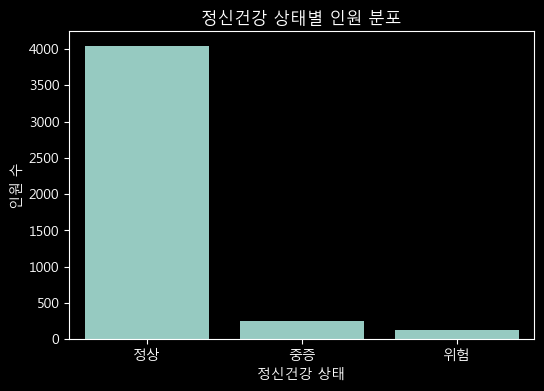

위험군_분류
정상    4043
중증     247
위험     122
Name: count, dtype: int64


/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_53544/1570985657.py:95: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(hn22_con['위험군_분류']))


In [ ]:
# phq 점수가 15 이상이거나 gad 점수가 15 이상이면 '위험'
# phq 점수가 10 이상 14 이하이거나 gad 점수가 10 이상 14 이하면 '중증'
# 그 외 '정상'
def mental_group(hn):
    if (hn['PHQ_점수'] >= 15 or hn['GAD_점수'] >= 15) :
        return '위험'
    elif 10 <= hn['PHQ_점수'] <= 14 or 10 <= hn['GAD_점수'] <= 14 :
        return '중증'
    else:
        return '정상'
    
hn22['위험군_분류'] = hn22.apply(mental_group, axis = 1) 



# 각 그룹별 gad 점수 분포도(GAD 점수 이상치 제거 후)
plt.figure(figsize=(6, 4))
sns.countplot(data=hn22, x='위험군_분류', order=['정상', '중증', '위험'])
plt.title('정신건강 상태별 인원 분포')
plt.xlabel('정신건강 상태')
plt.ylabel('인원 수')
plt.show()
print(pd.value_counts(hn22['위험군_분류']))

***

## 2) 새로운 분석결과
* 후속 분석에서는 정신건강 분류 그룹(정상, 중증, 위험) 간의 인구통계학적 특성 차이를 중심으로 성별과 연령에 따른 분포 차이를 살펴보았다.<br>
성별 분포에 대한 카이제곱 검정 결과, p-value가 0.9671로 나타나 정신건강 상태와 성별 간에는 유의미한 연관성이 없었으며 성별은 독립적인 변수로 해석되었다.<br>
반면, 연령에 대해서는 ANOVA 결과 p-value가 0.0000으로 나타나 정신건강 그룹 간 연령 분포에는 통계적으로 유의미한 차이가 있음이 확인되었다.<br>
사후검정 결과 특히 정상 그룹과 중증 그룹 간의 연령 차이가 유의미하였으며, 중증 그룹이 상대적으로 연령대가 낮은 경향을 보였다.<br>
또한 전체 응답자 연령대 분포를 살펴본 결과, 40대 이상 중장년층의 응답 비율이 높았으며, 분석 결과 해석 시 이러한 연령 편중을 고려할 필요가 있음을 확인하였다.

### 성별과 위험군 분류

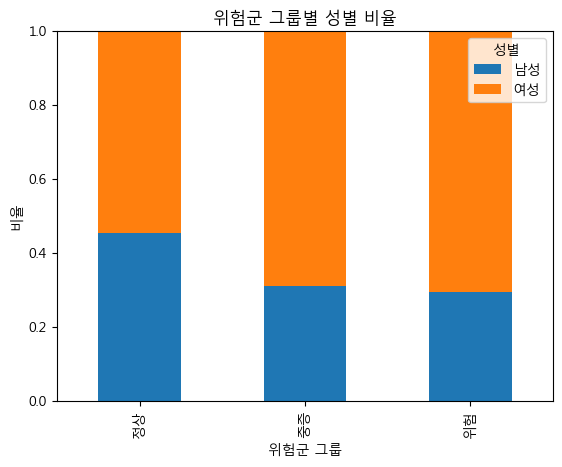

In [8]:
data['sex'] = data['sex'].replace({1 : '남성', 2 : '여성'})

ct_sex = pd.crosstab(data['위험군_분류'], data['sex'], normalize= 'index')
ct_sex = ct_sex.reindex(['정상', '중증', '위험'])

# 성별 시각화
ct_sex.plot(kind='bar', stacked= True)
plt.title('위험군 그룹별 성별 비율')
plt.xlabel('위험군 그룹')
plt.ylabel('비율')
plt.ylim(0, 1)
plt.legend(title='성별')
plt.show()

#### 그래프 해석
> 위 그래프는 정신건강 상태별 그룹에서 남성과 여성의 비율을 나타낸 것이다.<br>
‘위험’ 및 ‘중증’ 그룹에서는 여성의 비율이 각각 약 70%, 60%에 달해, 정신건강 취약군에서 여성의 비율이 상대적으로 높다는 점을 시각적으로 확인할 수 있다.

In [10]:
# 카이제곱 검정
chi2, p, dof, expected = sp.stats.chi2_contingency(ct_sex)
print(f'카이제곱 통계량: {chi2:.2f}, p-value: {p:.4f}')

카이제곱 통계량: 0.07, p-value: 0.9671


#### 가설 검정
- 귀무가설(H₀): 정신건강 상태(위험군 분류)와 성별은 서로 독립적이다 (성별 분포에 차이가 없다)
- 대립가설(H₁): 정신건강 상태(위험군 분류)와 성별은 서로 관련이 있다 (성별 분포에 차이가 있다)

#### 결과 해석
- p-value = 0.9671는 매우 높고, 일반적인 유의수준 0.05보다 훨씬 큼
- 따라서 귀무가설을 기각할 수 없음
- 즉, 정신건강 상태와 성별 사이에 통계적으로 유의한 차이는 없다

#### 결론
> 위험군 분류와 성별 간의 관계를 확인하기 위해 카이제곱 검정을 실시했을 떄  p-value는 0.9671로 유의수준 0.05보다 훨씬 높게 나타났다.<br>
이는 정신건강 그룹 간의 성별 분포에 통계적으로 유의미한 차이가 없음을 의미하며 성별은 정신건강 상태 분류와 독립적인 변수로 볼 수 있다.

### 나이와 위험군 분류

In [15]:
age_cut = age_cut = [20, 30, 40, 50, 60, 70, 80]
age_names = ['20대', '30대', '40대', '50대', '60대', '70대']
data['age_group'] = pd.cut(data.age, age_cut, labels = age_names, right = False)
data

,Unnamed: 0,sex,age,PHQ_점수,GAD_점수,스트레스_인지,주중 수면 시간,아침식사빈도,점심식사빈도,저녁식사빈도,음주빈도_1년,물섭취량_하루,과일섭취빈도_1년,채소섭취빈도_1년,식이보충제복용여부_1년,평소앉는시간_시간,60분이상신체활동일수,1주일근력운동일수,위험군_분류,age_group
0,0,남성,66,0.0,0.0,0.0,9.0,1.0,1.0,1.0,3.0,5.0,2.0,1.0,1.0,11.0,88.0,1.0,정상,60대
1,1,여성,62,0.0,0.0,0.0,7.0,1.0,1.0,1.0,2.0,5.0,2.0,1.0,1.0,5.0,88.0,4.0,정상,60대
2,2,여성,61,0.0,0.0,1.0,5.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,5.0,88.0,1.0,정상,60대
3,3,여성,22,3.0,3.0,1.0,5.0,3.0,1.0,1.0,1.0,2.5,6.0,2.0,2.0,9.0,88.0,1.0,정상,20대
4,4,여성,53,0.0,3.0,0.0,6.0,1.0,1.0,1.0,8.0,6.0,1.0,1.0,1.0,6.0,88.0,5.0,정상,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,4407,남성,33,5.0,16.0,1.0,6.0,4.0,1.0,2.0,4.0,5.0,7.0,5.0,2.0,6.0,88.0,1.0,위험,30대
4408,4408,남성,53,15.0,9.0,1.0,7.0,2.0,1.0,1.0,5.0,7.5,7.0,1.0,2.0,10.0,88.0,3.0,위험,50대
4409,4409,여성,55,9.0,21.0,1.0,8.0,1.0,1.0,1.0,1.0,7.5,2.0,1.0,1.0,10.0,88.0,1.0,위험,50대
4410,4410,여성,67,15.0,0.0,1.0,9.0,1.0,1.0,1.0,8.0,5.0,2.0,1.0,1.0,8.0,88.0,1.0,위험,60대


In [13]:
# null값 확인 및 분포도 확인 
data['age_group'].value_counts()

age_group
60대    981
50대    762
40대    719
70대    680
30대    543
20대    483
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '20대'),
  Text(1, 0, '30대'),
  Text(2, 0, '40대'),
  Text(3, 0, '50대'),
  Text(4, 0, '60대'),
  Text(5, 0, '70대')])

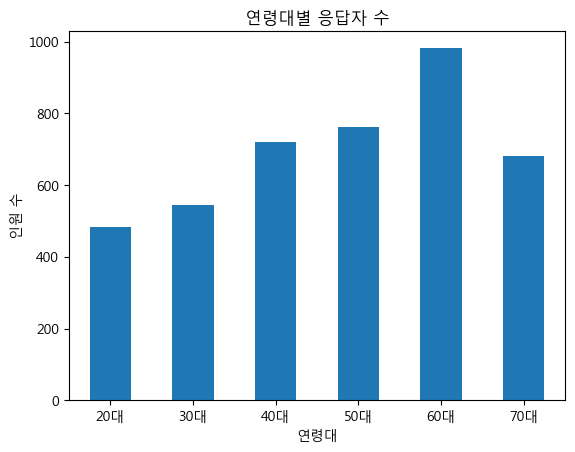

In [21]:
age_counts = data['age_group'].value_counts().sort_index()
age_counts.plot(kind='bar')
plt.title('연령대별 응답자 수')
plt.xlabel('연령대')
plt.ylabel('인원 수')
plt.xticks(rotation=0) 

#### 그래프 해석
> 위 그래프에 따르면 전체 응답자 중 40대부터 70대까지의 비중이 높게 나타나며, 특히 60대가 가장 많았다.<br>
따라서 본 분석은 중장년층을 중심으로 한 연령 편중의 영향을 고려하여 해석할 필요가 있다.

In [23]:
# 카이제곱 검정
ct_age = pd.crosstab(data['age'], data['age'])
chi2, p, dof, expected = sp.stats.chi2_contingency(ct_age)
print(f'카이제곱 통계량: {chi2:.2f}, p-value: {p:.4f}')

카이제곱 통계량: 269132.00, p-value: 0.0000


#### 가설 검정
- 귀무가설(H₀): 정신건강 상태(위험군 분류)와 연령은 서로 독립적이다 (연령 분포에 차이가 없다)  
- 대립가설(H₁): 정신건강 상태(위험군 분류)와 연령은 서로 관련이 있다 (연령 분포에 차이가 있다)

#### 결과 해석
- p-value = 0.0000은 일반적인 유의수준 0.05보다 매우 작음  
- 따라서 귀무가설을 기각할 수 있음  
- 즉, 정신건강 상태와 연령 사이에는 통계적으로 유의한 차이가 있다

#### 결론
> 정신건강 상태(위험군 분류)와 연령 간의 관계를 확인하기 위해 카이제곱 검정을 실시했을 떄 <br>
p-value는 0.0000으로 유의수준 0.05보다 작게 나타났다 <br>
이는 정신건강 그룹 간 연령 분포에 통계적으로 유의미한 차이가 있음을 의미하며 <br>
연령은 정신건강 상태 분류와 관련이 있는 변수로 해석될 수 있다.

<Axes: xlabel='위험군_분류', ylabel='age'>

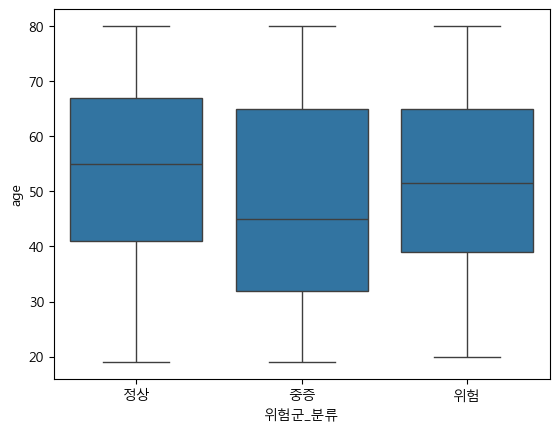

In [11]:
sns.boxplot(data=data, x = '위험군_분류', y = 'age', order = ['정상', '중증', '위험'])


#### 그래프 해석
> 위 그래프는 정신건강 상태별 그룹에서 연령 분포를 나타낸 것이다 <br>
‘정상’ 그룹은 중앙값이 가장 높고 ‘중증’ 그룹은 가장 낮아 정신건강 취약군일수록 연령대가 낮은 경향이 있음을 시각적으로 확인할 수 있다.

In [14]:
# 위험군 분류에 따라 age(나이)가 유의하게 다른지 ANOVA(일원분산분석)로 검정
ss_n = data[data['위험군_분류'] == '정상']['age']
ss_m = data[data['위험군_분류'] == '중증']['age']
ss_r = data[data['위험군_분류'] == '위험']['age']

f_stat, p = stats.f_oneway(ss_n, ss_m, ss_r)
print(f"F 통계량: {f_stat:.3f}")
print(f"p-value: {p:.4f}")

F 통계량: 11.409
p-value: 0.0000


####  가설 검정
- 귀무가설(H0): 정신건강 상태(위험군 분류)와 연령 간에는 차이가 없다 (세 그룹의 평균 연령은 같다)
- 대립가설(H1): 정신건강 상태에 따라 연령 차이가 존재한다 (적어도 하나의 그룹 평균 연령은 다르다)

#### 결과 해석
- p-value = 0.0000은 유의수준 0.05보다 매우 작음
- 따라서 귀무가설을 기각할 수 있음
- 즉, 정신건강 상태와 연령 간에는 통계적으로 유의한 차이가 있음

#### 결론

> 정신건강 상태(위험군 분류)에 따른 연령 차이를 확인하기 위해 일원분산분석(ANOVA)을 실시했을 때
F 통계량은 11.409, p-value는 0.0000으로 유의수준 0.05보다 작게 나타남을 알 수 있다.<br>
이는 정신건강 그룹 간 평균 연령에 통계적으로 유의미한 차이가 있음을 의미하며
연령이 정신건강 상태를 설명하는 데 중요한 변수로 작용할 수 있다.

In [ ]:
# ANOVA에서 유의미한 차이가 있을 경우, 그룹 간 평균 차이를 확인하기 위한 Tukey 사후검정 수행
posthoc = pairwise_tukeyhsd(data['age'], data['위험군_분류'], alpha=0.05)
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
위험,정상,2.2456,0.3222,-1.4191,5.9103,False
위험,중증,-2.8951,0.2732,-7.3082,1.5181,False
정상,중증,-5.1406,0.0,-7.7546,-2.5267,True


#### 해석
> Tukey 사후검정 결과, 정상 그룹과 중증 그룹 간의 연령 차이만 통계적으로 유의미하게 나타났다(p < 0.05) <br>
위험 그룹은 다른 그룹들과의 연령 차이에서 유의미한 차이를 보이지 않았다.

***

## 결론 및 토의
* 본 분석에서는 정신건강 상태(정상, 중증, 위험) 간 성별과 연령의 분포 차이를 중심으로 후속 분석을 수행하였다.<br>
그 결과, 성별은 정신건강 상태와 독립적이었으나, 연령은 정신건강 상태와 유의미한 관련성을 가지는 변수로 나타났다.<br>
특히 중증군에서 상대적으로 연령대가 낮은 응답자가 더 많았으며, 이는 젊은 층의 정신건강 문제에 대한 관심과 대응이 필요함을 시사한다.<br>
또한 전체 응답자 중 중장년층의 비율이 높게 나타났기 때문에, 연구 결과를 해석할 때 데이터의 연령 편향성을 함께 고려해야 하며, 추후 분석이나 정책 제안 시에는 연령대별 정신건강 문제의 특성과 요구를 반영할 필요가 있다.

***